<a href="https://colab.research.google.com/github/JasonT2512/Bank-customer-segmentation/blob/main/Bank_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.1 MB 25.1 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=344582 sha256=0cc21ba4f96abff0c100f6260dd9d510f13a25946bc6211ba08425d19ddbfdc6
  Stored in directory: /tmp/pip-ephem-wheel-cache-22gjowgc/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built ydata-profiling
  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 4.0.0
    Uninstalling ydata-profiling-4.0.0:
      Successfully uninstalled ydata-profiling-4.0.0


In [ ]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

<ipython-input-3-7de7f3834c9c>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [ ]:
from pycaret.clustering import *

# **Loading data**

In [ ]:
cust = pd.read_csv('cust.csv')
cust.head()

customer_id  segment province_city
0      1016846  Regular        HA NOI
1      1016868  Regular   HO CHI MINH
2      1016903  Regular   HO CHI MINH
3      1016936  Regular   HO CHI MINH
4      1016938  Regular        HA NOI

In [ ]:
prod_holding = pd.read_csv('prod_holding.csv')
prod_holding.head()

customer_id  prod_ca  prod_td  prod_credit_card  prod_app  \
0      1016846        1        0               0.0         1   
1      1016868        1        0               0.0         1   
2      1016903        1        0               0.0         1   
3      1016936        1        0               0.0         1   
4      1016938        1        0               1.0         1   

   prod_secured_loan  prod_upl  
0                  0         0  
1                  0         0  
2                  0         1  
3                  0         0  
4                  0         1

In [ ]:
aum = pd.read_csv('aum.csv')
aum.head()

customer_id        amount
0       999992  6.197167e+08
1       999994  5.312117e+07
2      1000017  0.000000e+00
3      1000018  6.678269e+04
4      1000021  7.766416e+07

In [ ]:
data = prod_holding.merge(aum, on = 'customer_id', how = 'inner').merge(cust, on = 'customer_id', how = 'inner')
data.head()

customer_id  prod_ca  prod_td  prod_credit_card  prod_app  \
0      1016846        1        0               0.0         1   
1      1016868        1        0               0.0         1   
2      1016903        1        0               0.0         1   
3      1016936        1        0               0.0         1   
4      1016938        1        0               1.0         1   

   prod_secured_loan  prod_upl         amount  segment province_city  
0                  0         0   36362.608333  Regular        HA NOI  
1                  0         0   55172.208333  Regular   HO CHI MINH  
2                  0         1  241653.416667  Regular   HO CHI MINH  
3                  0         0   64215.191667  Regular   HO CHI MINH  
4                  0         1   45915.133333  Regular        HA NOI

# **Data cleaning**

In [ ]:
pp.ProfileReport(data, title = 'Customer report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From profile_report, I discover that:
  - There are 996 missing values in prod_credit_card. Since prod_credit_card is categorical variable, I replace missing values with 0, which indicates not using credit card.
  - 9% of the users have 0 account balance.

In [ ]:
data['prod_credit_card'] = data['prod_credit_card'].fillna(value = 0)

Recheck for missing value

In [ ]:
data.isna().sum()

customer_id          0
prod_ca              0
prod_td              0
prod_credit_card     0
prod_app             0
prod_secured_loan    0
prod_upl             0
amount               0
segment              0
province_city        0
dtype: int64

In [ ]:
print('The total number of data-points before cleaning is' + ' ' + str(len(data)))

The total number of data-points before cleaning is 113066


In [ ]:
data = data[data['amount'] > 0]

In [ ]:
print('The total number of data-points after cleaning is' + ' ' + str(len(data)))

The total number of data-points after cleaning is 102922


In [ ]:
data['total_product'] = data['prod_ca'] + data['prod_td'] + data['prod_credit_card'] + data['prod_app'] + data['prod_secured_loan'] + data['prod_upl']

In [ ]:
data

customer_id  prod_ca  prod_td  prod_credit_card  prod_app  \
0           1016846        1        0               0.0         1   
1           1016868        1        0               0.0         1   
2           1016903        1        0               0.0         1   
3           1016936        1        0               0.0         1   
4           1016938        1        0               1.0         1   
...             ...      ...      ...               ...       ...   
113061       126523        1        1               1.0         1   
113062      1284395        1        0               1.0         1   
113063      1286275        1        0               0.0         1   
113064      1298809        1        1               0.0         1   
113065      1298427        1        1               0.0         1   

        prod_secured_loan  prod_upl        amount  segment province_city  \
0                       0         0  3.636261e+04  Regular        HA NOI   
1                       0         0  5.517221e+04  Regular   HO CHI MINH   
2                       0         1  2.416534e+05  Regular   HO CHI MINH   
3                       0         0  6.421519e+04  Regular   HO CHI MINH   
4                       0         1  4.591513e+04  Regular        HA NOI   
...                   ...       ...           ...      ...           ...   
113061                  0         0  8.981080e+08     Gold   HO CHI MINH   
113062                  1         0  8.122194e+07     Gold      VUNG TAU   
113063                  0         0  1.199882e+08     Gold     NHA TRANG   
113064                  0         0  5.568517e+10     Gold   HO CHI MINH   
113065                  0         1  1.070622e+09     Gold      NAM DINH   

        total_product  
0                 2.0  
1                 2.0  
2                 3.0  
3                 2.0  
4                 4.0  
...               ...  
113061            4.0  
113062            4.0  
113063            2.0  
113064            3.0  
113065            4.0  

[102922 rows x 11 columns]

# **Data preprocessing**



* The prod_ca, prod_td, prod_credit_card, prod_app, prod_secured_loan, prod_upl, segment should all be categorical data because these columns indicate usage of service and the value should be 1 (yes) or 0 (no).
* The segment and province_city should be encoded label.



In [ ]:
data.dtypes

customer_id            int64
prod_ca                int64
prod_td                int64
prod_credit_card     float64
prod_app               int64
prod_secured_loan      int64
prod_upl               int64
amount               float64
segment               object
province_city         object
total_product        float64
dtype: object

In [ ]:
data['prod_ca'] = data['prod_ca'].astype('category')
data['prod_td'] = data['prod_td'].astype('category')
data['prod_credit_card'] = data['prod_credit_card'].astype('category')
data['prod_app'] = data['prod_app'].astype('category')
data['prod_secured_loan'] = data['prod_secured_loan'].astype('category')
data['prod_upl'] = data['prod_upl'].astype('category')

In [ ]:
data['segment'].value_counts()

Regular    83114
Silver     16208
Gold        3600
Name: segment, dtype: int64

In [ ]:
data['province_city'].value_counts()

HO CHI MINH       34232
HA NOI            33404
No Info            4850
HAI PHONG          3030
THANH HOA          1986
DA NANG            1848
NAM DINH           1809
NGHE AN            1583
DONG NAI           1542
THUA THIEN HUE     1534
QUANG NINH         1429
BAC GIANG          1318
HOA BINH           1206
HAI DUONG          1086
HA TINH            1059
BINH DUONG         1044
AN GIANG            910
THAI BINH           889
CAN THO             888
VINH PHUC           841
QUANG BINH          827
LONG AN             642
PHU THO             554
NHA TRANG           506
BINH THUAN          477
VINH LONG           455
BINH DINH           446
DONG THAP           425
BAC NINH            411
THAI NGUYEN         381
VUNG TAU            272
KIEN GIANG          247
QUANG TRI           234
GIA LAI             210
QUANG NAM           192
TIEN GIANG           65
DA LAT               43
DAKLAK               36
CA MAU                8
HA NAM                2
Lang son              1
Name: province_c

In [ ]:
data['segment'] = data['segment'].astype('category')
data['segment_encode'] = data['segment'].cat.codes
data['segment_encode'] = data['segment_encode'].astype('category')

I will group province_city information by the region that it belongs to.

In [ ]:
North = ['HA NOI', 'HAI PHONG', 'NAM DINH', 'QUANG NINH', 'BAC GIANG', 'HOA BINH', 'HAI DUONG', 'VINH PHUC', 'PHU THO', 'BAC NINH', 'THAI NGUYEN', 'LANG SON', 'HA NAM', 'HUNG YEN', 'THAI BINH']
Middle = ['THANH HOA', 'DA NANG', 'NGHE AN', 'THUA THIEN HUE', 'HA TINH', 'NHA TRANG', 'QUANG TRI', 'GIA LAI', 'QUANG NAM', 'DA LAT', 'DAKLAK', 'QUANG BINH']
South = ['HO CHI MINH', 'DONG NAI', 'BINH DUONG', 'AN GIANG', 'LONG AN', 'BINH THUAN', 'BINH DUONG', 'VINH LONG', 'BINH DINH', 'DONG THAP', 'VUNG TAU', 'KIEN GIANG', 'TIEN GIANG', 'CA MAU', 'CAN THO']

In [ ]:
data['province_city'] = data['province_city'].str.upper()
data['region'] = data.apply(lambda row: 'North' if row['province_city'] in North
                            else 'Middle' if row['province_city'] in Middle
                            else 'Middle' if row['province_city'] in South
                            else 'Unknown', axis = 1)

In [ ]:
data['region'] = data['region'].astype('category')
data['region_encode'] = data['region'].cat.codes
data['region_encode'] = data['region_encode'].astype('category')

In [ ]:
data.head()

customer_id prod_ca prod_td prod_credit_card prod_app prod_secured_loan  \
0      1016846       1       0              0.0        1                 0   
1      1016868       1       0              0.0        1                 0   
2      1016903       1       0              0.0        1                 0   
3      1016936       1       0              0.0        1                 0   
4      1016938       1       0              1.0        1                 0   

  prod_upl         amount  segment province_city  total_product  \
0        0   36362.608333  Regular        HA NOI            2.0   
1        0   55172.208333  Regular   HO CHI MINH            2.0   
2        1  241653.416667  Regular   HO CHI MINH            3.0   
3        0   64215.191667  Regular   HO CHI MINH            2.0   
4        1   45915.133333  Regular        HA NOI            4.0   

  segment_encode  region region_encode  
0              1   North             1  
1              1  Middle             0  
2              1  Middle             0  
3              1  Middle             0  
4              1   North             1

In [ ]:
data.dtypes

customer_id             int64
prod_ca              category
prod_td              category
prod_credit_card     category
prod_app             category
prod_secured_loan    category
prod_upl             category
amount                float64
segment              category
province_city          object
total_product         float64
segment_encode       category
region               category
region_encode        category
dtype: object

I will explore the numeric columns

In [ ]:
data['total_product'].describe()

count    102922.000000
mean          2.256136
std           0.504753
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           6.000000
Name: total_product, dtype: float64

In [ ]:
data['amount'].describe()

count    1.029220e+05
mean     7.193507e+07
std      1.071883e+09
min      5.000000e-02
25%      3.015863e+04
50%      8.434094e+04
75%      1.658189e+06
max      1.325000e+11
Name: amount, dtype: float64

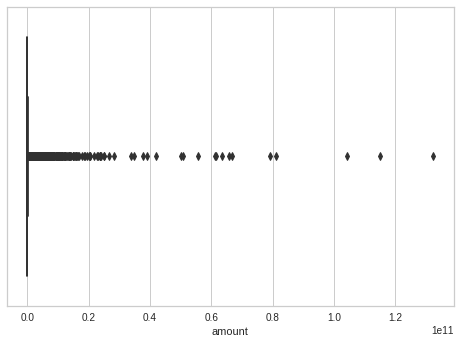

In [ ]:
sns.boxplot(data['amount'])

There are clearly outliers in the amount column. I will use Interquartile range method to remove outliers.

In [ ]:
# calculate interquartile range
q25, q75 = np.percentile(data['amount'], 25), np.percentile(data['amount'], 75)
iqr = q75 - q25

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in data['amount'] if x < lower or x > upper]

In [ ]:
len(outliers)

20690

In [ ]:
len(data['amount'])

102922

In [ ]:
# calculate interquartile range
q25, q75 = np.percentile(data['amount'], 25), np.percentile(data['amount'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data['amount'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data['amount'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=30158.625, 75th=1658188.748, IQR=1628030.123
Identified outliers: 20690
Non-outlier observations: 82232


In [ ]:
model_data = data.drop(labels = ['customer_id', 'segment', 'province_city', 'region'], axis = 1)
model_data.head()

prod_ca prod_td prod_credit_card prod_app prod_secured_loan prod_upl  \
0       1       0              0.0        1                 0        0   
1       1       0              0.0        1                 0        0   
2       1       0              0.0        1                 0        1   
3       1       0              0.0        1                 0        0   
4       1       0              1.0        1                 0        1   

          amount  total_product segment_encode region_encode  
0   36362.608333            2.0              1             1  
1   55172.208333            2.0              1             0  
2  241653.416667            3.0              1             0  
3   64215.191667            2.0              1             0  
4   45915.133333            4.0              1             1

In [ ]:
model_data = model_data[(model_data['amount'] <= upper) & (model_data['amount'] >= lower)]

Running model

In [ ]:
s = setup(model_data, normalize = True)

Description                 Value
0                               session_id                  3012
1                            Original Data           (82232, 10)
2                           Missing Values                 False
3                         Numeric Features                     2
4                     Categorical Features                     8
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data           (82232, 20)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  602a
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='UNSUPERVIS

In [ ]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.6124         69244.2306          0.7339            0           0   

   Completeness  
0             0

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=3012, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
evaluate_model(kmeans)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=3012, tol=0.0001, verbose=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [ ]:
result = assign_model(kmeans)
result.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=3012, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(82232, 11)
INFO:logs:assign_model() succesfully completed......................................


prod_ca prod_td prod_credit_card prod_app prod_secured_loan prod_upl  \
0       1       0              0.0        1                 0        0   
1       1       0              0.0        1                 0        0   
2       1       0              0.0        1                 0        1   
3       1       0              0.0        1                 0        0   
4       1       0              1.0        1                 0        1   

          amount  total_product segment_encode region_encode    Cluster  
0   36362.608333            2.0              1             1  Cluster 0  
1   55172.208333            2.0              1             0  Cluster 3  
2  241653.416667            3.0              1             0  Cluster 2  
3   64215.191667            2.0              1             0  Cluster 3  
4   45915.133333            4.0              1             1  Cluster 2

In [ ]:
result['Cluster'].value_counts()

Cluster 3    33256
Cluster 0    33032
Cluster 2    10883
Cluster 1     5061
Name: Cluster, dtype: int64

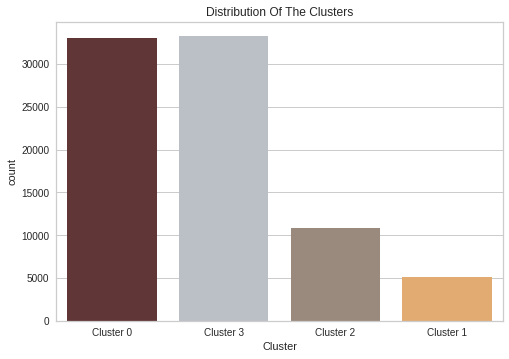

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=result["Cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
result['amount'].mean()

319984.9391948998

In [ ]:
cluster0 = result[result['Cluster']=='Cluster 0'].reset_index()
cluster1 = result[result['Cluster']=='Cluster 1'].reset_index()
cluster2 = result[result['Cluster']=='Cluster 2'].reset_index()
cluster3 = result[result['Cluster']=='Cluster 3'].reset_index()

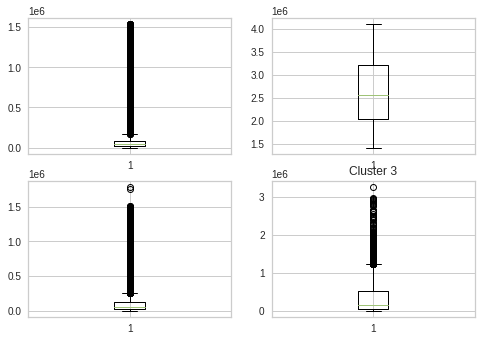

In [ ]:
fig, axs = plt.subplots(2,2)
axs[0, 0].boxplot(x="amount", data= cluster0)
plt.title('Cluster 0')
axs[0, 1].boxplot("amount", data= cluster1)
plt.title('Cluster 1')
axs[1, 1].boxplot("amount", data= cluster2)
plt.title('Cluster 2')
axs[1, 0].boxplot("amount", data= cluster3)
plt.title('Cluster 3')
plt.show()

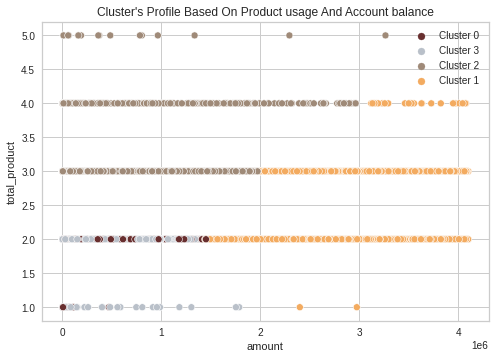

In [ ]:
pl = sns.scatterplot(data = result,x=result["amount"], y=result["total_product"],hue=result["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Product usage And Account balance")
plt.legend()
plt.show()

Cluster pattern:
  - Cluster 0: Low account balance and high total product usage
  - Cluster 1: Low account balance and low total product usage
  - Cluster 2: Low account balance and low total product usage
  - Cluster 3: High account balance and high total product usage

# Conclusion: In this project, I performed unsupervised clustering with pycaret. I came up with 4 clusters and further used them in profiling customers in clusters according to their product usage and account balance. This can be used in planning better marketing strategies.